## Import the necessary libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset

In [44]:
df = pd.read_csv('./winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Get general informations about the dataset
* Number of rows
* Number of columns
* List of columns
* Type of each column

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


## Clean the data before processed further

### 1. Exclude unnecessary columns

In [46]:
df = df[['country', 'points', 'variety']]
df.head()

,country,points,variety
0,Italy,87,White Blend
1,Portugal,87,Portuguese Red
2,US,87,Pinot Gris
3,US,87,Riesling
4,US,87,Pinot Noir


### 2. Check if there are any missing values in each column

In [47]:
df.isna().sum()

country    63
points      0
variety     1
dtype: int64

### 3. Remove rows with missing missing values

In [48]:
# Drop rows with missing values in the dataframe
df.dropna(inplace=True)

# Re-check to unsure that there are no missing values
df.isna().sum()

country    0
points     0
variety    0
dtype: int64

## Question 1: What are the varieties of wine?

### a. Get only the unique values in the column 'variety'

In [49]:
# Print the number of wine varieties
print(len(df['variety'].unique()))

# Print the wine list of wine varieties
print(df['variety'].unique())

701
['White Blend' 'Portuguese Red' 'Pinot Gris' 'Riesling' 'Pinot Noir'
 'Tempranillo-Merlot' 'Frappato' 'Gewürztraminer' 'Cabernet Sauvignon'
 'Nerello Mascalese' 'Chardonnay' 'Malbec' 'Tempranillo Blend' 'Meritage'
 'Red Blend' 'Merlot' "Nero d'Avola" 'Chenin Blanc' 'Gamay'
 'Sauvignon Blanc' 'Viognier-Chardonnay' 'Primitivo' 'Catarratto'
 'Inzolia' 'Petit Verdot' 'Monica' 'Bordeaux-style White Blend' 'Grillo'
 'Sangiovese' 'Cabernet Franc' 'Champagne Blend'
 'Bordeaux-style Red Blend' 'Aglianico' 'Petite Sirah' 'Touriga Nacional'
 'Carmenère' 'Albariño' 'Petit Manseng' 'Rosé' 'Zinfandel' 'Vernaccia'
 'Rosato' 'Grüner Veltliner' 'Viognier' 'Vermentino' 'Grenache Blanc'
 'Syrah' 'Nebbiolo' 'Shiraz-Cabernet Sauvignon' 'Pinot Blanc'
 'Alsace white blend' 'Barbera' 'Rhône-style Red Blend' 'Portuguese White'
 'Graciano' 'Tannat-Cabernet' 'Sauvignon' 'Sangiovese Grosso' 'Torrontés'
 'Prugnolo Gentile' 'G-S-M' 'Verdejo' 'Fumé Blanc' 'Furmint'
 'Pinot Bianco' 'Bonarda' 'Shiraz' 'Montepulcia

See that there are so many (701) varieties of wine.

### b. Get the top 3 most popular wine varieties

In [50]:
top_variety = df['variety'].value_counts()[:3]
top_variety

Pinot Noir            13269
Chardonnay            11750
Cabernet Sauvignon     9470
Name: variety, dtype: int64

### c. Calculate the portion of the top 3 most popular wines in the dataset

In [51]:
# a function to rename the non-top varieties
def rename_non_top_variety(variety, new_name='Other'):
    if variety in top_variety.index:
        return variety
    else:
        return new_name

# rename all the non-top varieties
top_variety_and_other = df['variety'].apply(
    lambda i: rename_non_top_variety(i)
)

# Show the number of the top varieties against the other varieties
top_variety_and_other.value_counts()

Other                 95418
Pinot Noir            13269
Chardonnay            11750
Cabernet Sauvignon     9470
Name: variety, dtype: int64

### d. Plot the portion of the top 3 most popular wines in a pie chart

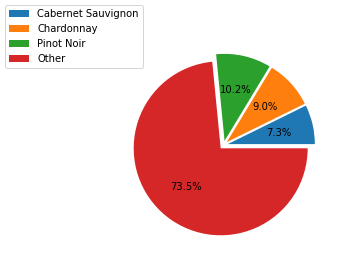

In [52]:
# Create the pie chart
plt.pie(
    top_variety_and_other.value_counts().sort_values(),
    autopct='%.1f%%',
    explode=(0.05,0.05,0.05,0.05),
)

# Add title to the pie chart
plt.title('The Top 3 Wine Varieties',fontdict={'color': 'white'})

# Add legend to the pie chart
plt.figlegend(
    labels=top_variety_and_other.value_counts().sort_values().index,
    loc='upper left'
)

## Question 2: Now I know some varieties, which one to pick then?

### a. Calculate the average points of each popular wine (Pinot Noir, Cabernet Sauvignon, Chardonnay)

In [53]:
# calculate the average points of each variety
points_per_variety = df.groupby('variety')['points'].mean()

# get the points of the top 3 popular wines
points_top_varieties = points_per_variety.loc[top_variety.index]

### b. Plot the average points of Pinot Noir, Cabernet Sauvignon, and Chardonnay in a bar chart

<AxesSubplot:title={'center':'The Average Points of The Top 3 Popular Wines'}, ylabel='Average Points'>

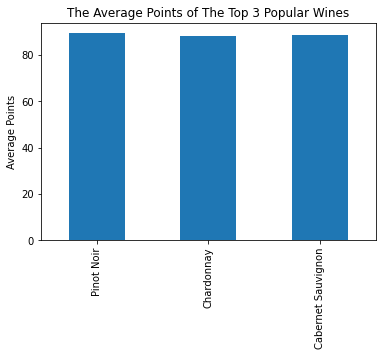

In [62]:
points_top_varieties.plot(
    kind='bar',
    ylabel='Average Points',
    title='The Average Points of The Top 3 Popular Wines'
)

## 3. Are the most popular wines the best wines?

### a. Get the top 3 varieties in terms of points

In [55]:
top_points_variety = points_per_variety.sort_values(ascending=False)[:3]
top_points_variety

variety
Tinta del Pais     95.0
Gelber Traminer    95.0
Terrantez          95.0
Name: points, dtype: float64

### b. Plot the top 3 varieties in terms of points in a bar chart

<AxesSubplot:title={'center':'The Top 3 Varieties in Terms of Points'}, ylabel='Average Points'>

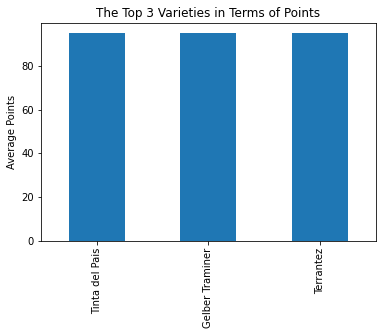

In [60]:
top_points_variety.plot(
    xlabel='',
    kind='bar',
    ylabel='Average Points',
    title='The Top 3 Varieties in Terms of Points'
)